In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [14]:
X = []
Y = []
X = [((x+1)/100) for x in range(100)]
Y = [(y * 15) for y in X]

print(X)
print(Y)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[0.15, 0.3, 0.44999999999999996, 0.6, 0.75, 0.8999999999999999, 1.05, 1.2, 1.3499999999999999, 1.5, 1.65, 1.7999999999999998, 1.9500000000000002, 2.1, 2.25, 2.4, 2.5500000000000003, 2.6999999999999997, 2.85, 3.0, 3.15, 3.3, 3.45, 3.5999999999999996, 3.75, 3.9000000000000004, 4.050000000000001, 4.2, 4.35, 4.5, 4.65, 4.8, 4.95, 5.1000000000000005, 5.25, 5.3999999999999995, 5.55, 5.7, 5.8500000000000005, 6.0,

In [0]:
x = np.array(X,dtype=float)
y = np.array(Y,dtype=float)

x = np.array(x).reshape(100, 1, 1)

In [17]:
x.shape

(100, 1, 1)

In [18]:
y.shape

(100,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [20]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
history = model.fit(x_train,y_train,epochs=2000,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 80 samples, validate on 20 samples
Epoch 1/2000





80/80 [==============================] - 2s 30ms/step - loss: 80.8598 - val_loss: 56.7296
Epoch 2/2000
80/80 [==============================] - 0s 312us/step - loss: 80.7326 - val_loss: 56.6311
Epoch 3/2000
80/80 [==============================] - 0s 285us/step - loss: 80.6047 - val_loss: 56.5319
Epoch 4/2000
80/80 [==============================] - 0s 274us/step - loss: 80.4747 - val_loss: 56.4289
Epoch 5/2000
80/80 [==============================] - 0s 282us/step - loss: 80.3426 - val_loss: 56.3205
Epoch 6/2000
80/80 [==============================] - 0s 289us/step - loss: 80.1939 - val_loss: 56.2064
Epoch 7/2000
80/80 [==============================] - 0s 286us/step - loss: 80.0461 - val_loss: 56.0836
Epoch 8/2000
80/80 [==============================] - 0s 292us/step - loss: 79.8848 - val_loss: 55.9522
Epoch 9/2000
80/80 [===

In [0]:
results = model.predict(x_test)

In [23]:
results.shape

(20, 1)

In [24]:
y_test.shape

(20,)

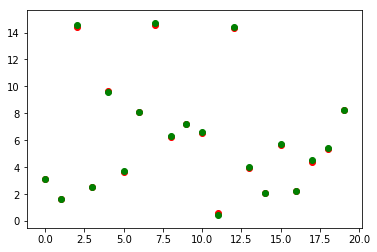

In [25]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()